In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [4]:
X_train = X_train / 255.0

In [5]:
X_test = X_test / 255.0

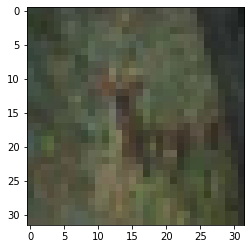

In [8]:
plt.imshow(X_train[10])

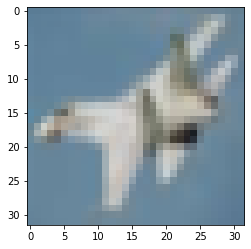

In [9]:
plt.imshow(X_test[10])

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_trained = to_categorical(y_train)

In [12]:
y_tested = to_categorical(y_test)

In [13]:
y_trained.shape

(50000, 10)

In [14]:
y_tested.shape

(10000, 10)

In [15]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D

In [16]:
model = tensorflow.keras.models.Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,verbose=1,mode='min')

In [19]:
model.fit(X_train,y_trained,epochs=10,
         validation_data=(X_test,y_tested),
         callbacks=[early_stop],
         batch_size=128)

Epoch 1/10
391/391 [==============================] - 156s 400ms/step - loss: 1.4789 - accuracy: 0.4662 - val_loss: 1.1439 - val_accuracy: 0.5936
Epoch 2/10
391/391 [==============================] - 113s 290ms/step - loss: 1.0193 - accuracy: 0.6420 - val_loss: 0.9409 - val_accuracy: 0.6701
Epoch 3/10
391/391 [==============================] - 115s 294ms/step - loss: 0.8363 - accuracy: 0.7088 - val_loss: 0.8312 - val_accuracy: 0.7106
Epoch 4/10
391/391 [==============================] - 108s 275ms/step - loss: 0.7111 - accuracy: 0.7523 - val_loss: 0.7858 - val_accuracy: 0.7296
Epoch 5/10
391/391 [==============================] - 112s 287ms/step - loss: 0.6196 - accuracy: 0.7833 - val_loss: 0.7649 - val_accuracy: 0.7352
Epoch 6/10
391/391 [==============================] - 111s 283ms/step - loss: 0.5375 - accuracy: 0.8109 - val_loss: 0.7716 - val_accuracy: 0.7403
Epoch 00006: early stopping


In [20]:
test_loss, accuracy = model.evaluate(X_test,y_tested)

313/313 [==============================] - 6s 19ms/step - loss: 0.7716 - accuracy: 0.7403


In [21]:
print(accuracy)

0.7402999997138977


In [22]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1000
           1       0.87      0.85      0.86      1000
           2       0.60      0.66      0.63      1000
           3       0.58      0.55      0.56      1000
           4       0.74      0.66      0.69      1000
           5       0.72      0.55      0.62      1000
           6       0.69      0.90      0.78      1000
           7       0.85      0.78      0.81      1000
           8       0.83      0.88      0.85      1000
           9       0.87      0.76      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



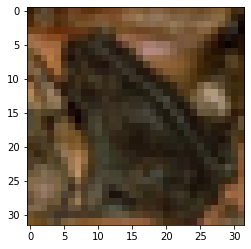

In [26]:
test = X_test[30]
plt.imshow(test.reshape(32,32,3))

In [28]:
model.predict_classes(test.reshape(1,32,32,3))

array([6])